In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from matplotlib import pyplot as plt

import pickle

In [ ]:
! mkdir ~/.kaggle

In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
#downloading the dataset from source which is kaggle
! kaggle datasets download suvooo/hindi-character-recognition

 91% 69.0M/76.1M [00:00<00:00, 83.2MB/s]
100% 76.1M/76.1M [00:00<00:00, 80.5MB/s]


In [ ]:
! unzip hindi-character-recognition.zip

Streaming output truncated to the last 5000 lines.
  inflating: DevanagariHandwrittenCharacterDataset/Train/digit_7/10299.png  
  inflating: DevanagariHandwrittenCharacterDataset/Train/digit_7/10300.png  
  inflating: DevanagariHandwrittenCharacterDataset/Train/digit_7/10301.png  
  inflating: DevanagariHandwrittenCharacterDataset/Train/digit_7/10302.png  
  inflating: DevanagariHandwrittenCharacterDataset/Train/digit_7/10303.png  
  inflating: DevanagariHandwrittenCharacterDataset/Train/digit_7/10304.png  
  inflating: DevanagariHandwrittenCharacterDataset/Train/digit_7/10306.png  
  inflating: DevanagariHandwrittenCharacterDataset/Train/digit_7/10307.png  
  inflating: DevanagariHandwrittenCharacterDataset/Train/digit_7/104017.png  
  inflating: DevanagariHandwrittenCharacterDataset/Train/digit_7/104018.png  
  inflating: DevanagariHandwrittenCharacterDataset/Train/digit_7/104019.png  
  inflating: DevanagariHandwrittenCharacterDataset/Train/digit_7/104021.png  
  inflating: Devanaga

In [ ]:
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.preprocessing import image_dataset_from_directory

im_size = (32,32)
batch_size = 32


#horizontal flip, rotation range and shear range are the parameters used for preventing overfitting the model, and here are splitting the training data into 2 parts i.e. train and validation
train_data = ImageDataGenerator(rescale=1./255,validation_split = 0.2,vertical_flip = True,
                                horizontal_flip=True,rotation_range=25,shear_range=0.5,)#
#flow from directory automatically detects folder names as classes 
train = train_data.flow_from_directory('/content/DevanagariHandwrittenCharacterDataset/Train',
                    class_mode="categorical", color_mode="grayscale",
                    batch_size=64, target_size=(32, 32), shuffle = True, seed = 1001,# target size means what size do you want of an image
                    subset = 'training', interpolation="bilinear", follow_links=False)

Found 62560 images belonging to 46 classes.


In [ ]:
#this is the validation data generated from train dataset
#we are rescaling the image using rescale parametere between 0 & 1 because images are in rgb format and 
#but such values would be too high for our model to process so we target values between 0 and 1 instead by scaling with a 1/255 
validation_data = ImageDataGenerator(rescale=1./255,validation_split = 0.2,)

validation = train_data.flow_from_directory('/content/DevanagariHandwrittenCharacterDataset/Train',
              class_mode="categorical", color_mode="grayscale",
              batch_size=64, target_size=(32, 32), shuffle = True, seed = 1010,
              subset = 'validation', interpolation="bilinear", follow_links=False)

Found 15640 images belonging to 46 classes.


In [ ]:
#this is the test data which we will use to test our models accuracy
test_data = ImageDataGenerator(rescale=1./255)

test = train_data.flow_from_directory('/content/DevanagariHandwrittenCharacterDataset/Test',
                    class_mode="categorical", classes=None, color_mode="grayscale",
                    batch_size=64,target_size=(32, 32),shuffle = False, seed = None,
                    subset = None, interpolation="bilinear", follow_links=False)

Found 13800 images belonging to 46 classes.


In [ ]:
import keras
from keras.callbacks import ModelCheckpoint,  EarlyStopping   


model = keras.Sequential([   #
    keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(32, 32, 1)), 
    keras.layers.MaxPool2D((2, 2)),
    Dropout(rate=0.45),
    keras.layers.Conv2D(32, (3, 3), activation='relu'),
    keras.layers.MaxPool2D((2, 2)),
    Dropout(rate=0.45),
    keras.layers.Conv2D(32, (3, 3), activation='relu'),
    keras.layers.MaxPool2D((2, 2)),
    Dropout(rate=0.45),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPool2D((2, 2)),
    Dropout(rate=0.45),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPool2D((2, 2)),
    Dropout(rate=0.45),
    keras.layers.Flatten(),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dense(46, activation='softmax')
])

94% accuracy

In [ ]:
#importing libraries
import keras
from keras.callbacks import ModelCheckpoint,  EarlyStopping
#early stopping is used when our model stops improving from previous accuracy so that it can stop automatically

model = keras.Sequential([
    keras.layers.Conv2D(16, (3, 3), activation='relu',padding='same', input_shape=(32, 32, 1)),  #input shape is shape of image we taking from train dataset
    keras.layers.Conv2D(16, (3, 3), activation='relu',padding='same'),  # we use paddig to not to loose features which are at the edges of an image 
    keras.layers.MaxPool2D((2, 2)),
    Dropout(rate=0.50),

    keras.layers.Conv2D(32, (3, 3),padding = 'same', activation='relu'),
    keras.layers.Conv2D(32, (3, 3),padding = 'same', activation='relu'),
    keras.layers.MaxPool2D((2, 2)),
    Dropout(rate=0.50),

    keras.layers.Conv2D(64, (3, 3), padding = 'same',activation='relu'),
    keras.layers.Conv2D(64, (3, 3), padding = 'same', activation='relu'),
    keras.layers.MaxPool2D((2, 2)),
    Dropout(rate=0.50),

    keras.layers.Flatten(),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dense(46, activation='softmax')  #here we have used softmax as a classifier becoz we have multiclass classification problem
])

this is new one

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#compiling the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy']) #accuracy is the metrics we are going to focus in this basic pipeline
model.summary()#this function shows the summary of the model

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_11 (Conv2D)          (None, 32, 32, 16)        160       
                                                                 
 conv2d_12 (Conv2D)          (None, 32, 32, 16)        2320      
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 16, 16, 16)       0         
 2D)                                                             
                                                                 
 dropout_8 (Dropout)         (None, 16, 16, 16)        0         
                                                                 
 conv2d_13 (Conv2D)          (None, 16, 16, 32)        4640      
                                                                 
 conv2d_14 (Conv2D)          (None, 16, 16, 32)        9248      
                                                      

Epoch 1/50
977/978 [============================>.] - ETA: 0s - loss: 2.6220 - accuracy: 0.2761
Epoch 00001: val_accuracy improved from -inf to 0.50761, saving model to base_model_.h5
978/978 [==============================] - 43s 43ms/step - loss: 2.6210 - accuracy: 0.2763 - val_loss: 1.7317 - val_accuracy: 0.5076
Epoch 2/50
978/978 [==============================] - ETA: 0s - loss: 1.3808 - accuracy: 0.5934
Epoch 00002: val_accuracy improved from 0.50761 to 0.68075, saving model to base_model_.h5
978/978 [==============================] - 43s 44ms/step - loss: 1.3808 - accuracy: 0.5934 - val_loss: 1.0751 - val_accuracy: 0.6808
Epoch 3/50
977/978 [============================>.] - ETA: 0s - loss: 0.9444 - accuracy: 0.7137
Epoch 00003: val_accuracy improved from 0.68075 to 0.74463, saving model to base_model_.h5
978/978 [==============================] - 42s 43ms/step - loss: 0.9445 - accuracy: 0.7137 - val_loss: 0.8450 - val_accuracy: 0.7446
Epoch 4/50
977/978 [=======================

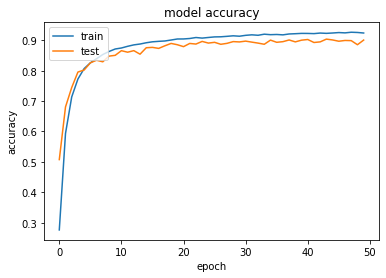

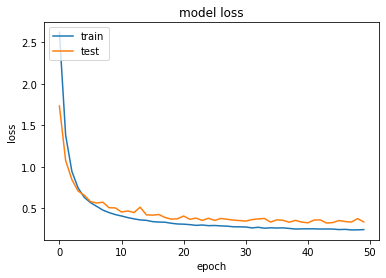

In [ ]:

checkpoint = ModelCheckpoint("base_model_.h5", monitor='val_accuracy', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', save_freq='epoch')
early = EarlyStopping(monitor='val_accuracy', min_delta=0, patience=10, verbose=1, mode='auto')

history = model.fit(train, validation_data=validation, epochs=50, callbacks=[checkpoint,early])#,steps_per_epoch=150, validation_steps=150)#, callbacks=[checkpoint,early])     #steps_per_epoch=150,, validation_steps=150


plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
import  numpy as np
img_width, img_height = 32, 32 
batch_size = 1 

datagen = ImageDataGenerator(rescale=1. / 255)

test = train_data.flow_from_directory('/content/DevanagariHandwrittenCharacterDataset/Test',
                    class_mode="categorical", classes=None, color_mode="grayscale",
                    batch_size=64,target_size=(32, 32),shuffle = False, seed = None,
                    subset = None, interpolation="bilinear", follow_links=False)  

test.reset()
   
pred= model.predict(test)
#predicted_classes = convert_to_class(pred)
predicted_class_indices=np.argmax(pred, axis =1 ) 
labels = (train.class_indices)
labels = dict((v, k) for k, v in labels.items())
predictions = [labels[k] for k in predicted_class_indices]
print(predicted_class_indices)
print (labels)
print (predictions)

Found 13800 images belonging to 46 classes.
[ 0  0  0 ... 45 45 45]
{0: 'character_10_yna', 1: 'character_11_taamatar', 2: 'character_12_thaa', 3: 'character_13_daa', 4: 'character_14_dhaa', 5: 'character_15_adna', 6: 'character_16_tabala', 7: 'character_17_tha', 8: 'character_18_da', 9: 'character_19_dha', 10: 'character_1_ka', 11: 'character_20_na', 12: 'character_21_pa', 13: 'character_22_pha', 14: 'character_23_ba', 15: 'character_24_bha', 16: 'character_25_ma', 17: 'character_26_yaw', 18: 'character_27_ra', 19: 'character_28_la', 20: 'character_29_waw', 21: 'character_2_kha', 22: 'character_30_motosaw', 23: 'character_31_petchiryakha', 24: 'character_32_patalosaw', 25: 'character_33_ha', 26: 'character_34_chhya', 27: 'character_35_tra', 28: 'character_36_gya', 29: 'character_3_ga', 30: 'character_4_gha', 31: 'character_5_kna', 32: 'character_6_cha', 33: 'character_7_chha', 34: 'character_8_ja', 35: 'character_9_jha', 36: 'digit_0', 37: 'digit_1', 38: 'digit_2', 39: 'digit_3', 40: 